In [1]:
from typing_extensions import TypedDict, Annotated, List, Literal
from langchain_core.messages import AnyMessage, AIMessage, HumanMessage, SystemMessage
from langgraph.graph import add_messages
from typing import Dict, List, Optional, Union, Literal
from pydantic import BaseModel, Field
from IPython.display import Image, display 
from langchain_core.messages import AnyMessage
from langgraph.graph.message import add_messages

In [2]:
## documents
class DocumentSection(BaseModel):
    title: str = Field(description="The title of the section")
    content: str = Field(description="The content of the section")
    

## security review
class SecurityReview(TypedDict):
    sec_id : str
    review : str
    file_path : str
    recommendation : str
    priority : Literal["high", "medium", "low"]
    
## test cases
class TestCase(TypedDict):
    test_id : str 
    description : str 
    steps : List[str]
    status : Literal["draft", "pass", "fail"] = "draft"

In [3]:
## Project Requirementsz
class ProjectRequirements(BaseModel):
    title: str = Field(description="The title of the project")
    description: str = Field(description="The description of the project")
    requirements : List[str] = Field(description="The requirements of the project")

In [4]:
## User story
class UserStory(BaseModel):
    story_id : str = Field(description="The id of the user story")
    title : str = Field(description="The title of the user story")
    description : str = Field(description="The description of the user story")
    acceptance_criteria : List[str] = Field(description="The acceptance criteria of the user story")

In [5]:
class SDLCState(BaseModel):
    project_requirements : ProjectRequirements
    revised_count : int = Field(default=0, description="The number of times the revised")
    # User story
    user_stories : List[UserStory] = []
    user_story_messages : Annotated[list, add_messages] = []
    user_story_status : Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"
    
    document_type: Literal["functional", "technical"] = "functional"
    # functional documents
    functional_documents : List[DocumentSection] = []
    functional_messages : Annotated[list, add_messages] = []
    functional_status: Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"
    # technical documents
    technical_documents : List[DocumentSection] = []
    technical_messages : Annotated[list, add_messages] = []
    technical_status: Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"
    
    code_type : Literal["frontend", "backend"] = "frontend"
    # frontend code
    frontend_code : str = Field(default='', description="The frontend code")
    frontend_messages: Annotated[list, add_messages] = []
    frontend_status: Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"
    # backend code
    backend_code : str = Field(default= '', description="The backend code")
    backend_messages: Annotated[list, add_messages] = []
    backend_status: Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"

    # security review
    security_reviews : List[SecurityReview] = []
    security_reviews_messages: Annotated[list, add_messages] = []
    security_reviews_status : Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"

    ## test cases
    test_cases : List[TestCase] = []
    test_cases_messages: Annotated[list, add_messages] = []
    test_cases_status : Literal["pending", "in_progress", "pending_approval", "feedback", "approved"] = "pending"

## Helper functions

In [6]:
def generate_user_stories_from_llm(project_title, project_description, requirements):
    user_stories = [{'story_id': 'US-001',
        'title': 'Secure Account with Multi-Factor Authentication',
        'description': 'As a user, I want to secure my account with multi-factor authentication so that my transactions are protected.',
        'acceptance_criteria': ['User can enable biometric authentication (fingerprint and facial recognition).',
        'User can set up MPIN for additional security.',
        'User can enable two-factor authentication for transactions.',
        'System alerts user of authentication failures.']}]
    
    return user_stories


def revised_user_stories_from_llm(user_stories, user_review):
    revised_user_stories = [{'story_id': 'US-001',
        'title': 'Secure Account with Multi-Factor Authentication',
        'description': 'As a user, I want to secure my account with multi-factor authentication so that my transactions are protected.',
        'acceptance_criteria': ['User can enable biometric authentication (fingerprint and facial recognition).',
        'User can set up MPIN for additional security.',
        'User can enable two-factor authentication for transactions.',
        'System alerts user of authentication failures.']},
        {'story_id': 'US-002',
        'title': 'Link Multiple Bank Accounts',
        'description': 'As a user, I want to link multiple bank accounts so that I can transfer funds instantly.',
        'acceptance_criteria': ['User can add multiple bank accounts to their profile.',
        'User can select any linked account for fund transfers.',
        'Linked accounts display current balance.',
        'System confirms successful linking of accounts.']}]
    return revised_user_stories

def generate_design_documents_from_llm(doc_type, user_stories, project_requirements, user_feedback = ""):
    documents = []
    if doc_type == "functional":
        documents = generate_functional_design_documents_from_llm(user_stories, project_requirements, user_feedback)
    elif doc_type == "technical":
        documents = generate_technical_design_documents_from_llm(user_stories, project_requirements, user_feedback)
    return documents

def generate_functional_design_documents_from_llm(user_stories, project_requirements, user_feedback = ""):
    documents = []
    if user_feedback == "":
        document = DocumentSection(
        title = f"FUNCTIONAL REQUIREMENTS",
        content = """
        FR-1: The system shall provide a "Forgot Password" option on the login page.  
        FR-2: The system shall send a time-limited reset link to the user's registered email address.  
        FR-3: The system shall validate new passwords against password policy rules.  
        FR-4: The system shall notify users of successful password reset and redirect them to the login page.
        """)
        documents.append(document)
    else: 
        documents = DocumentSection(
            title = f"Revised FUNCTIONAL REQUIREMENTS",
            content = """
            FR-1: The system shall provide a "Forgot Password" option on the login page.  
            FR-2: The system shall send a time-limited reset link to the user's registered email address.  
            FR-3: The system shall validate new passwords against password policy rules.  
            FR-4: The system shall notify users of successful password reset and redirect them to the login page.
        """)
        documents.append(document)
    return documents


def generate_technical_design_documents_from_llm(user_stories, project_requirements, user_feedback = ""):
    documents = []
    if user_feedback == "":
        document = DocumentSection(
        title =  "Technical Document: MODULES & COMPONENTS DESIGN",
        content = """
        - **Auth API Module:** Exposes RESTful endpoints for password reset request and confirmation  
        - **Token Service Module:** Generates, hashes, stores, and validates password reset tokens  
        - **Notification Service:** Sends password reset links securely via AWS SES  
        - **Audit Logging Module:** Captures all user-initiated reset activities for security auditing
        """),
        documents.append(document)
    else: 
        documents = DocumentSection(
            title = "Revised Technical Document: MODULES & COMPONENTS DESIGN",
        content = """
        - **Auth API Module:** Exposes RESTful endpoints for password reset request and confirmation  
        - **Token Service Module:** Generates, hashes, stores, and validates password reset tokens  
        - **Notification Service:** Sends password reset links securely via AWS SES  
        - **Audit Logging Module:** Captures all user-initiated reset activities for security auditing
        """),
        documents.append(document)
    return documents

## Node functions

In [7]:
## User stories 
def process_project_requirements(state : SDLCState) -> SDLCState:
    print("In process_project_requirements...")
    return {
        "user_story_messages" : AIMessage(content="I've received your project requirements. I'll now generate user stories based on these requirements.")
    }
    
def generate_user_stories(state : SDLCState) -> SDLCState:
    print("In generate_user_stories...") 
    project_title = state.project_requirements.title
    project_description = state.project_requirements.description
    requirements = state.project_requirements.requirements
    user_stories = generate_user_stories_from_llm(project_title, project_description, requirements);
    
    return {
        "user_story_status" : 'pending_approval',
        "user_stories" : user_stories,
        "user_story_messages" : AIMessage(
            content = f"Based on your requirements, I've generated {len(user_stories)} user stories. Please review these user stories and provide feedback or type 'Approved' if you're satisfied."
        ),
        "revised_count" : 0
    }

def user_stories_review(state : SDLCState) -> SDLCState:
    print("In user_stories_review...")
    user_review = state.user_story_messages[-1].content
    user_review = user_review.lower().strip()
    print("user_review : ", user_review)  
    if user_review == "approved":
        return {
            "user_story_messages" : AIMessage(content="Great! Your user stories have been finalized. You can now proceed with your design process."),
            "user_story_status" : "approved"
        }
    else:
        return {
            "user_story_messages" :  AIMessage(content="I've received your feedback. I'll revise the user stories accordingly."),
            "user_story_status" : "feedback"
        }

def should_revise_user_stories(state : SDLCState) -> Literal["feedback", "approved"]:
    return "approved" if state.user_story_status == "approved" else "feedback"   

def revised_user_stories(state : SDLCState) -> SDLCState:
    print("In revised_user_stories...")
    user_review = state.user_story_messages[-1].content
    user_review = user_review.lower().strip()
    if state.user_story_status == 'feedback':
        revised_count = state.revised_count + 1
        print("revised_count : ", revised_count)
        if revised_count == 3:
            return {
                "user_story_messages" :  AIMessage(
                    content = f"User stories have been revision maxed out. Please review the user stories and continue with the next step."
                ),
                "user_story_status" : "approved"
            }
        user_stories = revised_user_stories_from_llm(state.user_stories, user_review)
        return {
                "user_stories" : user_stories,
                "user_story_messages" : AIMessage(
                    content = "I've revised the user stories based on your feedback.\n\nPlease review these updated user stories and provide additional feedback or type 'Approved' if you're satisfied."),
                "user_story_status" : "pending_approval",
                "revised_count" : revised_count
            }

In [8]:
## Design documents
def create_design_documents(state : SDLCState) -> SDLCState:
    print("In create_design_documents...")
    doc_type = state.document_type.lower()
    user_stories = state.user_stories
    project_requirements = state.project_requirements
    documents = generate_design_documents_from_llm(doc_type, user_stories, project_requirements)

    return {
        f"{doc_type}_documents": documents,
        f"{doc_type}_status": 'pending_approval',
        f"{doc_type}_messages": AIMessage(
            content=f"Please review {doc_type} design document and provide feedback or type 'Approved' if you're satisfied."
        ),
    }
    pass 

def design_documents_review(state : SDLCState) -> SDLCState:
    print("In design_documents_review...")
    doc_type = state.document_type.lower()
    user_feedback = state.functional_messages[-1].content.lower().strip() if doc_type == "functional" else state.technical_messages[-1].content.lower().strip()
    print("user feedback:", user_feedback)
    approved = (user_feedback == "approved")
    response = {
        f"{doc_type}_messages": AIMessage(
            content="Great! Your design documents have been finalized. You can now proceed with your design process."
            if approved else
            "I've received your feedback. I'll revise the design documents accordingly."
        ),
        f"{doc_type}_status": "approved" if approved else "feedback"
    }
    return response

def should_revise_design_documents(state : SDLCState) -> Literal["feedback", "approved"]:
    if state.document_type == "functional":
        return "approved" if state.functional_status == "approved" else "feedback"   
    else:
        return "approved" if state.technical_status == "approved" else "feedback"   

def revised_design_documents(state : SDLCState) -> SDLCState:
    print("In revised_design_documents...")
    doc_type = state.document_type.lower()
    user_feedback = state.functional_messages[-1].content.lower().strip() if doc_type == "functional" else state.technical_messages[-1].content.lower().strip()
    print("user feedback:", user_feedback)
    
    revised_count = state.revised_count + 1
    print("revised_count :", revised_count)

    if revised_count == 3:
        return {
            f"{doc_type}_messages": AIMessage(
                content="Design documents have been revision maxed out. Please review the these documents and continue with the next step."
            ),
            f"{doc_type}_status": "approved"
        }

    documents = generate_design_documents_from_llm(doc_type, state.functional_documents, state.technical_documents, user_feedback)

    return {
        f"{doc_type}_documents": documents,
        f"{doc_type}_messages": AIMessage(
            content=f"Please review revised {doc_type} design documents and provide additional feedback or type 'Approved' if you're satisfied."
        ),
        f"{doc_type}_status": "pending_approval",
        "revised_count": revised_count
    }


## SDLC Workflow

In [9]:
## Node definition
from langgraph.graph import StateGraph, START, END
from langgraph.checkpoint.memory import MemorySaver
memory = MemorySaver()

sdlc_graph = StateGraph(SDLCState)

# Adding Nodes 
sdlc_graph.add_node("process_project_requirements", process_project_requirements)
sdlc_graph.add_node("generate_user_stories", generate_user_stories)
sdlc_graph.add_node("user_stories_review", user_stories_review)
sdlc_graph.add_node("revised_user_stories", revised_user_stories)

## Design documents 
sdlc_graph.add_node("create_design_documents", create_design_documents)
sdlc_graph.add_node("design_documents_review", design_documents_review)
sdlc_graph.add_node("revised_design_documents", revised_design_documents)


## User stories 
sdlc_graph.add_edge(START, "process_project_requirements")
sdlc_graph.add_edge("process_project_requirements", "generate_user_stories")
sdlc_graph.add_edge("generate_user_stories", "user_stories_review")
sdlc_graph.add_conditional_edges(
    "user_stories_review",
    should_revise_user_stories,
    {
        "feedback": "revised_user_stories",
        "approved": "create_design_documents"
    }
)
sdlc_graph.add_edge("revised_user_stories", "user_stories_review")

## Design documents 
sdlc_graph.add_edge("create_design_documents", "design_documents_review")
sdlc_graph.add_conditional_edges(
    "design_documents_review",
    should_revise_design_documents,
    {
        "feedback" : "revised_design_documents",
        "approved" : END
    }
)
sdlc_graph.add_edge("revised_design_documents", "design_documents_review")


# Compile the graph
sdlc_workflow = sdlc_graph.compile(checkpointer=memory, interrupt_before=["user_stories_review", "design_documents_review"])

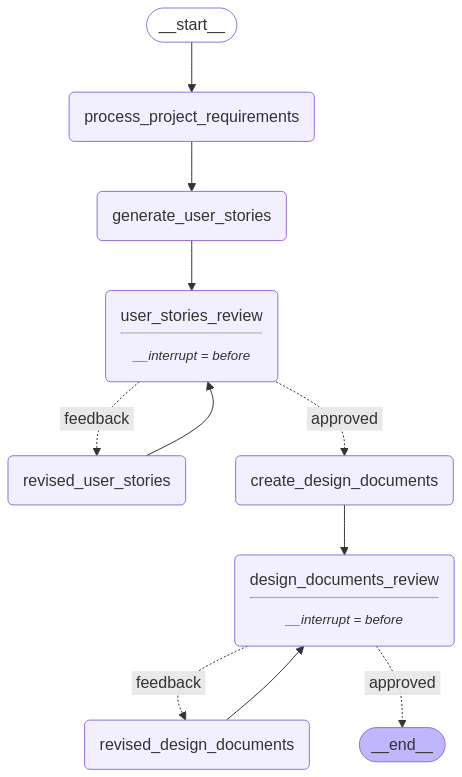

In [10]:
from IPython.display import Image, display
display(Image(sdlc_workflow.get_graph().draw_mermaid_png()))

# User stories

In [11]:
project_title = "PayMate: Your Ultimate Payment Companion"
project_description = "PayMate is a comprehensive payment application that allows users to perform seamless transactions using the Unified Payments Interface (UPI). Beyond basic payments, PayMate offers features such as quick loans, bill payments, and a user-friendly interface, making it a one-stop solution for all financial needs."
requirements = ["Implement multi-factor authentication, including biometrics (fingerprint and facial recognition) and MPIN, to secure user accounts.​", "Enable users to link multiple bank accounts and perform instant fund transfers using UPI.", "Provide users with access to instant micro-loans with minimal documentation.", "Allow users to pay utility bills such as electricity, water, gas, and broadband directly through the app."]
requirements_string = "\n".join(requirements)


In [12]:
project_requirements = ProjectRequirements(
    title = project_title,
    description = project_description,
    requirements = requirements
)

initial_story_state = {
    "project_requirements" : project_requirements,
    "user_stories": [],
    "user_story_messages": HumanMessage(content=f"{project_requirements}"),
    "user_story_status": "in_progress",
    "revised_count" : 0
}

# Thread
thread = {"configurable": {"thread_id": "1232345"}}

state = None
for event in sdlc_workflow.stream(initial_story_state, thread, stream_mode="values"):
    state = event

state

In process_project_requirements...
In generate_user_stories...


{'project_requirements': ProjectRequirements(title='PayMate: Your Ultimate Payment Companion', description='PayMate is a comprehensive payment application that allows users to perform seamless transactions using the Unified Payments Interface (UPI). Beyond basic payments, PayMate offers features such as quick loans, bill payments, and a user-friendly interface, making it a one-stop solution for all financial needs.', requirements=['Implement multi-factor authentication, including biometrics (fingerprint and facial recognition) and MPIN, to secure user accounts.\u200b', 'Enable users to link multiple bank accounts and perform instant fund transfers using UPI.', 'Provide users with access to instant micro-loans with minimal documentation.', 'Allow users to pay utility bills such as electricity, water, gas, and broadband directly through the app.']),
 'revised_count': 0,
 'user_stories': [{'story_id': 'US-001',
   'title': 'Secure Account with Multi-Factor Authentication',
   'description

In [13]:
current_state = sdlc_workflow.get_state(thread) 
current_state.next

('user_stories_review',)

In [14]:
user_feedback = "Add user story to buy insurance from the app"
# sdlc_workflow.update_state(thread, { "user_story_messages" : HumanMessage(content=f'{user_feedback}')})
sdlc_workflow.update_state(thread, { "user_story_messages" : HumanMessage(content='Approved')}, as_node="user_stories_review")

for event in sdlc_workflow.stream(None, thread, stream_mode="values"):
    state = event

state

In revised_user_stories...


{'project_requirements': ProjectRequirements(title='PayMate: Your Ultimate Payment Companion', description='PayMate is a comprehensive payment application that allows users to perform seamless transactions using the Unified Payments Interface (UPI). Beyond basic payments, PayMate offers features such as quick loans, bill payments, and a user-friendly interface, making it a one-stop solution for all financial needs.', requirements=['Implement multi-factor authentication, including biometrics (fingerprint and facial recognition) and MPIN, to secure user accounts.\u200b', 'Enable users to link multiple bank accounts and perform instant fund transfers using UPI.', 'Provide users with access to instant micro-loans with minimal documentation.', 'Allow users to pay utility bills such as electricity, water, gas, and broadband directly through the app.']),
 'revised_count': 0,
 'user_stories': [{'story_id': 'US-001',
   'title': 'Secure Account with Multi-Factor Authentication',
   'description

# Documentation

In [15]:
# initial_document_state = {
#     "functional_documents" : [],
#     "technical_documents" : [],
#     "document_type" : "functional",
#     "messages": [],
#     "functional_status": "in_progress",
#     "revised_count" : 0,
#     "version" : 1.0
# }

current_state = sdlc_workflow.get_state(thread) 
current_state.next



('user_stories_review',)